# Jobs In Data
Dataset extracted from a famous job portal (various data-related jobs posted during the year 2023)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import folium

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv('jobs_in_data.csv')
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [4]:
df['work_year'].unique()

array([2023, 2022, 2020, 2021], dtype=int64)

## Exploring different job categories

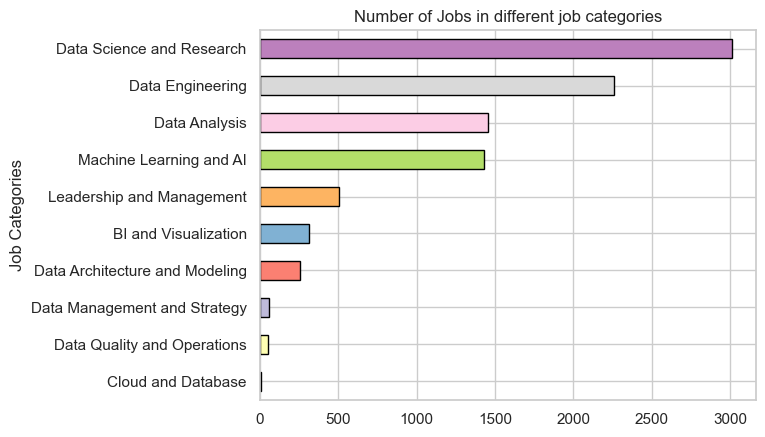

In [5]:
df['job_category'].value_counts().sort_values(ascending=True).plot(kind='barh',
                                                                   title='Number of Jobs in different job categories',
                                                                   ylabel='Job Categories', 
                                                                   color=plt.cm.Set3(np.arange(len(df))), 
                                                                   edgecolor='black')
plt.show()

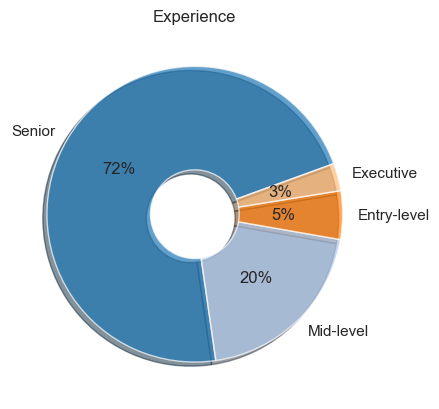

In [6]:
df['experience_level'].value_counts().plot(kind='pie', 
                colors=plt.cm.tab20(np.arange(len(df))), 
                wedgeprops={'width': 0.7, "alpha": 0.7}, 
                ylabel='', 
                title='Experience', 
                startangle=20, 
                autopct='%1.0f%%', 
                shadow=True)
plt.show()

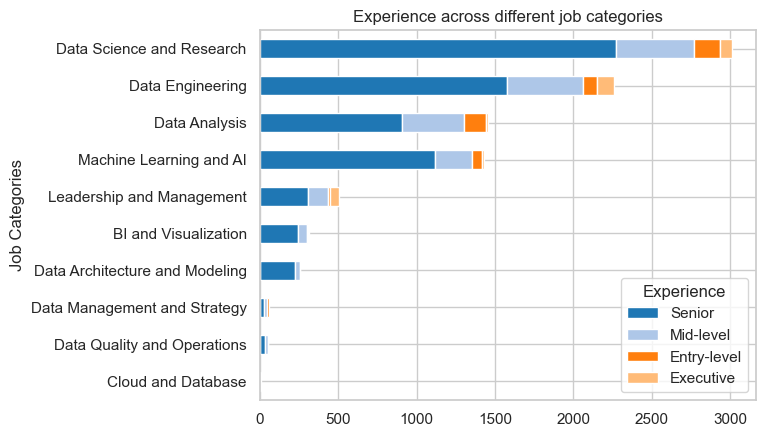

In [7]:
job_category_experience = df[['job_category', 'experience_level']]
category_experience_counts = job_category_experience.groupby(['job_category', 'experience_level']).size().unstack(fill_value=0)
category_experience_counts = category_experience_counts[['Senior', 'Mid-level', 'Entry-level', 'Executive']]
category_experience_counts['TotalJobs'] = category_experience_counts.sum(axis=1)
ax = category_experience_counts.sort_values(by='TotalJobs', ascending=True).drop(columns='TotalJobs').plot(
    kind='barh', 
    title='Experience across different job categories', 
    ylabel='Job Categories', 
    stacked=True, 
    color=plt.cm.tab20(np.arange(len(df))))

legend = ax.get_legend()
legend.set_title('Experience')
plt.show()

In [8]:
df['employment_type'].unique()

array(['Full-time', 'Part-time', 'Contract', 'Freelance'], dtype=object)

In [9]:
ctg_empl_type = df[['job_category', 'employment_type']]
ctg_empl_type = ctg_empl_type.groupby(['job_category', 'employment_type']).size().unstack(fill_value=0).rename_axis(index=None, columns=None)
ctg_empl_type

,Contract,Freelance,Full-time,Part-time
BI and Visualization,0,0,313,0
Cloud and Database,0,0,5,0
Data Analysis,7,1,1444,5
Data Architecture and Modeling,0,0,259,0
Data Engineering,1,2,2255,2
Data Management and Strategy,0,0,61,0
Data Quality and Operations,0,0,55,0
Data Science and Research,2,2,3005,5
Leadership and Management,0,1,502,0
Machine Learning and AI,9,5,1411,3


Most of the jobs in this data file are Full-time jobs.

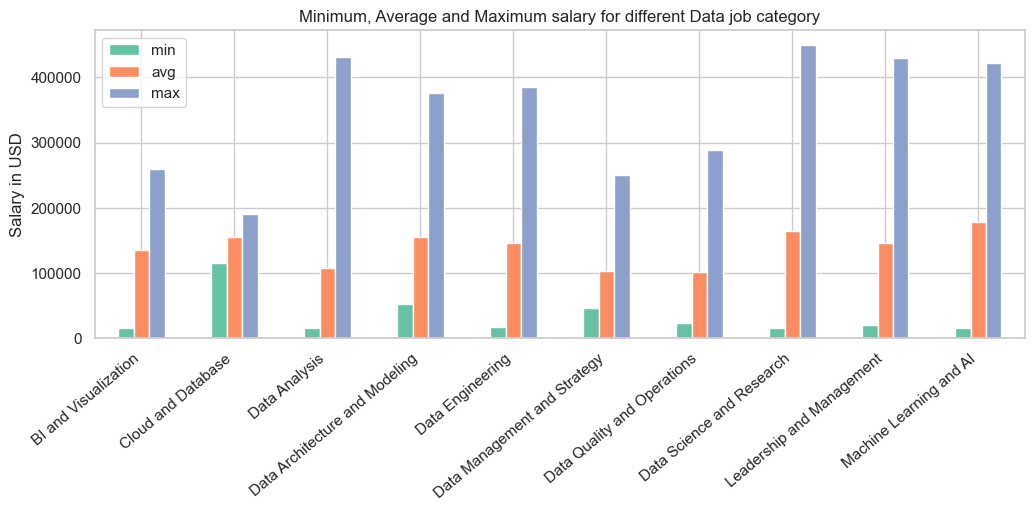

In [22]:
ctg_avg_salary = df[['job_category', 'salary_in_usd']]
grouped_by_ctg = ctg_avg_salary.groupby(['job_category'])

min = grouped_by_ctg.min().rename(columns={'salary_in_usd': 'min'})
avg = grouped_by_ctg.mean().round().rename(columns={'salary_in_usd': 'avg'})
max = grouped_by_ctg.max().rename(columns={'salary_in_usd': 'max'})

min_avg_max = pd.concat([min, avg, max], axis=1)
min_avg_max.plot(kind='bar', 
                 figsize=(12, 4), 
                 rot=40, 
                 title='Minimum, Average and Maximum salary for different Data job category',
                 ylabel='Salary in USD',
                 xlabel='',
                 color=plt.cm.Set2(np.arange(len(df))))
plt.xticks(ha='right')
plt.show()

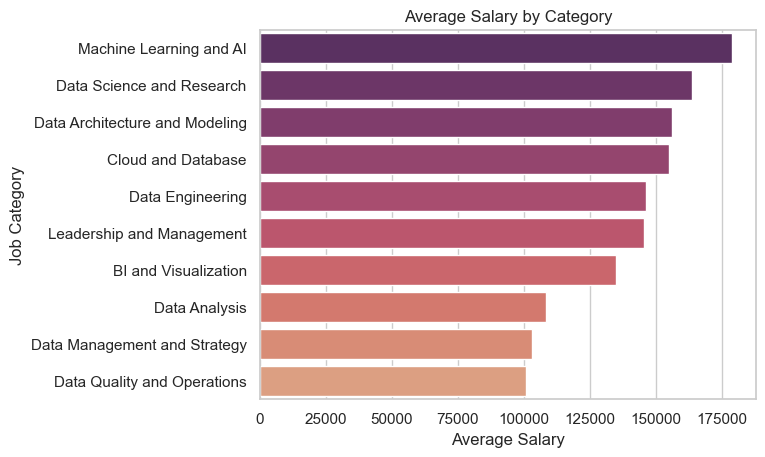

In [56]:
average_salary_by_category = df.groupby('job_category')['salary_in_usd'].mean().reset_index().sort_values(by='salary_in_usd', ascending=False)
average_salary_by_category.columns = ['Job Category', 'Average Salary']
sns.barplot(x='Average Salary', y='Job Category', data=average_salary_by_category, palette='flare_r', hue='Job Category')
plt.title('Average Salary by Category')
plt.show()

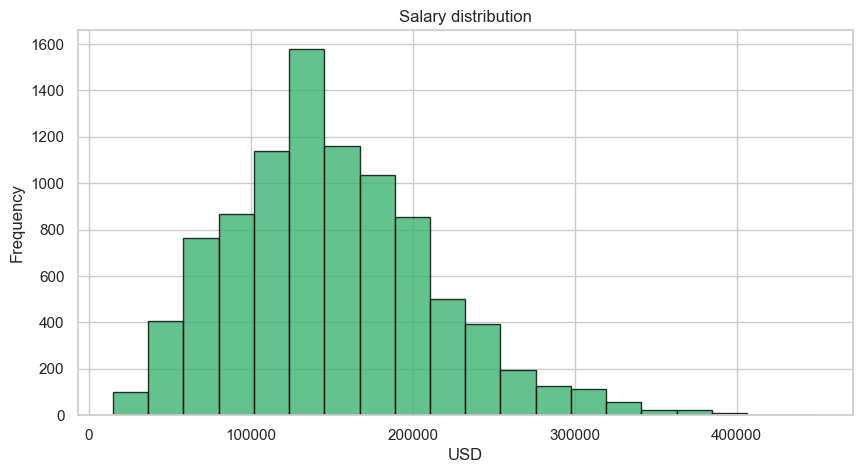

In [11]:
df['salary_in_usd'].plot(kind='hist', 
                         bins=20, 
                         color='mediumseagreen', 
                         figsize=(10, 5), 
                         title='Salary distribution',
                         xlabel='USD',
                         edgecolor='black',
                         alpha=0.8)
plt.show()

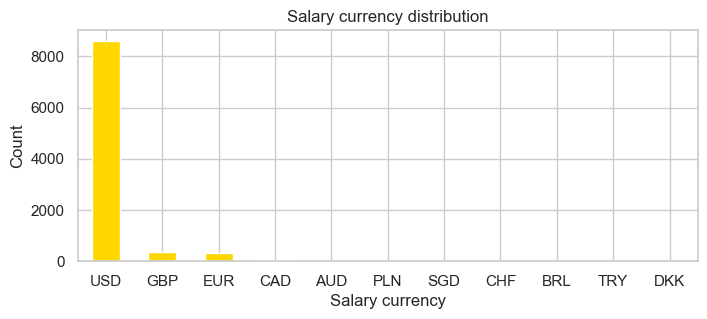

In [12]:
df['salary_currency'].value_counts().plot(kind='bar', 
                                          figsize=(8, 3), 
                                          color='gold', 
                                          title='Salary currency distribution', 
                                          ylabel='Count',
                                          xlabel='Salary currency',
                                          rot=0)
plt.show()

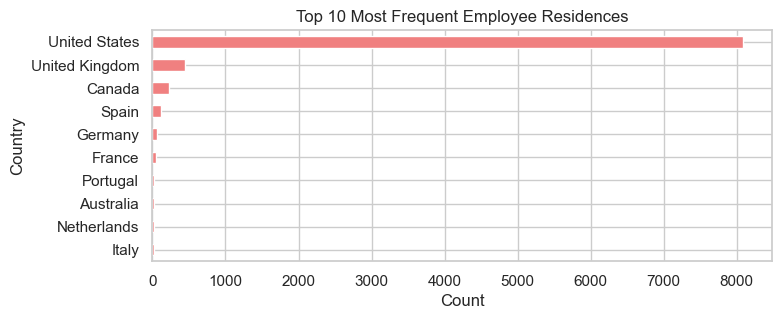

In [13]:
df['employee_residence'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', 
                                                                                  figsize=(8, 3),
                                                                                  title='Top 10 Most Frequent Employee Residences',
                                                                                  ylabel='Country',
                                                                                  xlabel='Count',
                                                                                  color='lightcoral')
plt.show()

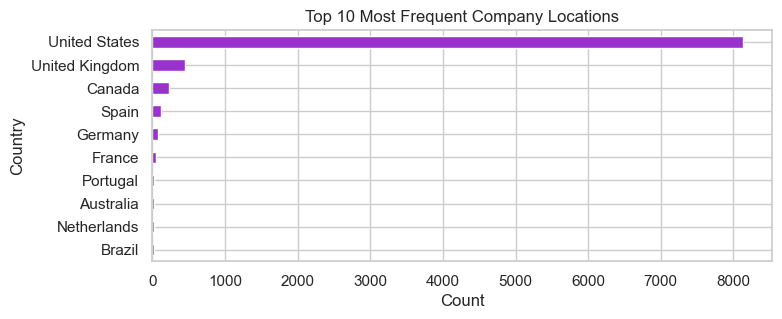

In [14]:
df['company_location'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh',
                                                                                figsize=(8, 3),
                                                                                title='Top 10 Most Frequent Company Locations', 
                                                                                ylabel='Country',
                                                                                xlabel='Count',
                                                                                color='darkorchid')
plt.show()

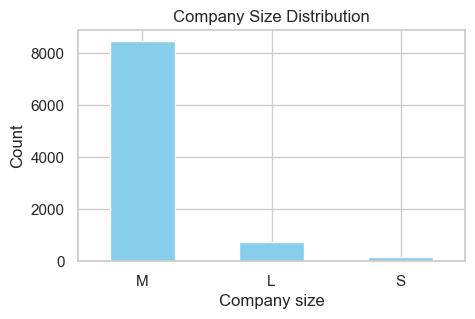

In [19]:
df['company_size'].value_counts().plot(kind='bar', 
                                       figsize=(5, 3), 
                                       rot=0,
                                       title='Company Size Distribution',
                                       xlabel='Company size',
                                       ylabel='Count',
                                       color='skyblue')
plt.show()

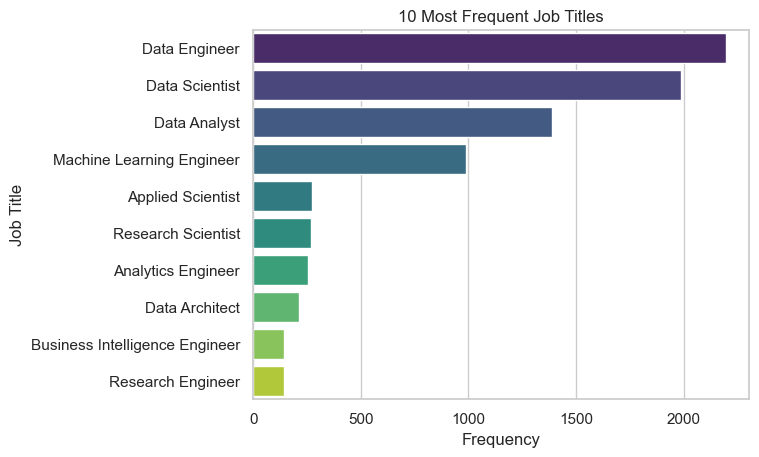

In [30]:
most_freq_jobs = df['job_title'].value_counts().head(10).reset_index()
most_freq_jobs.columns = ['Job Title', 'Frequency']
sns.barplot(x='Frequency', y='Job Title', data=most_freq_jobs, palette='viridis', hue='Job Title')
plt.title('10 Most Frequent Job Titles')
plt.show()